In [1]:
import os
import pandas as pd
import numpy as np
from collections import Counter
from skmultilearn.model_selection import iterative_train_test_split
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

## Read the created dataset and attach column values

In [2]:
dataset = pd.read_csv('output-data/cta-dataset/dataset_cta.csv')
dataset

,class,column_name,file_name,relation_label,type_label,density,selection_type
0,Product,offers:pricecurrency,Product_corememoriesco.com_September2020.json.gz,priceCurrency,currency,100,Inter Similarity
1,Product,offers:price,Product_corememoriesco.com_September2020.json.gz,price,price,100,Value Heterogeneity
2,Event,startdate,Event_davidlohmueller.com_September2020.json.gz,startDate,DateTime,100,Inter Similarity
3,Event,enddate,Event_davidlohmueller.com_September2020.json.gz,endDate,DateTime,100,Inter Similarity
4,Product,offers:pricecurrency,Product_winehousegvl.com_September2020.json.gz,priceCurrency,currency,100,Inter Similarity
...,...,...,...,...,...,...,...
171993,CreativeWork,author:name,CreativeWork_ywbc.org.uk_September2020.json.gz,author,Person,100,Random
171994,Event,location:name,Event_kivasports.net_September2020.json.gz,location,Place,95,Random 3
171995,Event,organizer:email,Event_kivasports.net_September2020.json.gz,email,email,72,Random 3
171996,SportsEvent,name,SportsEvent_blastertagassociation.com_Septembe...,name,SportsEvent/name,100,Random 2


In [3]:
col_table = (dataset['column_name']+'|'+dataset['file_name']).tolist()

In [4]:
col_table[0]

'offers:pricecurrency|Product_corememoriesco.com_September2020.json.gz'

### Add value columns

In [5]:
dir_ = 'output-data/expanded-tables/'

In [6]:
#Returns values of textual columns
def get_values(col_table_name):
    column_name, file_name = col_table_name.split('|')
    
    file = dir_ + file_name
    
    #Open table
    df = pd.read_json(file, compression='gzip', lines=True)
           
    return df[column_name].tolist()

In [7]:
pool = multiprocessing.Pool(processes=25)
values = pool.map(get_values, col_table)
pool.close()
pool.join()

In [8]:
dataset['values'] = values
dataset

,class,column_name,file_name,relation_label,type_label,density,selection_type,values
0,Product,offers:pricecurrency,Product_corememoriesco.com_September2020.json.gz,priceCurrency,currency,100,Inter Similarity,"[USD, USD, USD, USD, USD, USD, USD, USD, USD, ..."
1,Product,offers:price,Product_corememoriesco.com_September2020.json.gz,price,price,100,Value Heterogeneity,"[7.25, 24.95, 26.95, 24.95, 39.95, 24.95, 26.9..."
2,Event,startdate,Event_davidlohmueller.com_September2020.json.gz,startDate,DateTime,100,Inter Similarity,"[2021-05-04T19:00:00+01:00, 2021-03-07T17:30:0..."
3,Event,enddate,Event_davidlohmueller.com_September2020.json.gz,endDate,DateTime,100,Inter Similarity,"[2021-05-04T21:30:00+01:00, 2021-03-07T19:00:0..."
4,Product,offers:pricecurrency,Product_winehousegvl.com_September2020.json.gz,priceCurrency,currency,100,Inter Similarity,"[USD, USD, USD, USD, USD, USD, USD, USD, USD, ..."
...,...,...,...,...,...,...,...,...
171993,CreativeWork,author:name,CreativeWork_ywbc.org.uk_September2020.json.gz,author,Person,100,Random,"[Rev Richard Alford, Phil Jackman, Phil Jackma..."
171994,Event,location:name,Event_kivasports.net_September2020.json.gz,location,Place,95,Random 3,"[KIVA Sports Center, KIVA Sports Center, None,..."
171995,Event,organizer:email,Event_kivasports.net_September2020.json.gz,email,email,72,Random 3,[&#99;ourtne&#121;&#64;k&#105;&#118;as&#112;&#...
171996,SportsEvent,name,SportsEvent_blastertagassociation.com_Septembe...,name,SportsEvent/name,100,Random 2,[Fluffy Rainbow Unicorn Soldiers vs. Doomsday ...


## Create training, validation and test split

In [15]:
grouped_by_table = dataset.groupby(['file_name'])['type_label'].apply(','.join).reset_index()
grouped_by_table

,file_name,type_label
0,Book_1000kitap.com_September2020.json.gz,"Integer,Language,BookFormatType"
1,Book_100bestbooks.ru_September2020.json.gz,"Text,Text,Person"
2,Book_103.92.226.18_September2020.json.gz,"BookFormatType,Text,Book/name,Person,Identifie..."
3,Book_11x17.pt_September2020.json.gz,"Date,Book/name,IdentifierAT,Integer"
4,Book_12baliv.com.ua_September2020.json.gz,"Number,Number,Book/name,Person,Language,Organi..."
...,...,...
41333,TVEpisode_yle.fi_September2020.json.gz,"Text,DateTime,CreativeWorkSeries,TVEpisode/name"
41334,TVEpisode_zavis.online_September2020.json.gz,"TVEpisode/name,Text,DateTime,Integer,Person,Text"
41335,TVEpisode_zazangels.com_September2020.json.gz,"TVEpisode/name,Duration,Text,URL,Person,Creati..."
41336,TVEpisode_zebrahead.org_September2020.json.gz,"TVEpisode/name,Text,URL,CreativeWorkSeries,Dur..."


In [16]:
X = grouped_by_table[["file_name"]].values

### One hot encoding of CTA labels

In [17]:
all_labels = dataset['type_label'].unique()
len(all_labels)

97

In [19]:
y = np.zeros(shape=(len(grouped_by_table['file_name'].tolist()), len(all_labels))) #encoded labels

In [20]:
for index, row in grouped_by_table.iterrows():
    table_labels = row['type_label'].split(',')
    count = 0
    
    for label in all_labels:
        if label in table_labels:
            y[index][count] = 1
        else:
            y[index][count] = 0
        count += 1

In [21]:
X

array([['Book_1000kitap.com_September2020.json.gz'],
       ['Book_100bestbooks.ru_September2020.json.gz'],
       ['Book_103.92.226.18_September2020.json.gz'],
       ...,
       ['TVEpisode_zazangels.com_September2020.json.gz'],
       ['TVEpisode_zebrahead.org_September2020.json.gz'],
       ['TVEpisode_zoids-col.net_September2020.json.gz']], dtype=object)

In [22]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size = 0.2)
print('Training set length: '+str(len(X_train)) +', Testing set length: '+ str(len(X_test)))

Training set length: 32772, Testing set length: 8566


In [24]:
#Relation Labels in each set
pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=1) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=1) for combination in row)
}).T.fillna(0.0)

,"(57,)","(18,)","(15,)","(21,)","(66,)","(34,)","(27,)","(4,)","(78,)","(1,)",...,"(88,)","(52,)","(53,)","(39,)","(32,)","(60,)","(54,)","(55,)","(86,)","(83,)"
train,823,3592,2876,1577,639,3719,2767,8571,620,4194,...,86,310,1066,485,630,515,1116,666,241,369
test,326,1112,790,430,160,1065,830,2622,158,1049,...,22,78,266,132,208,167,279,167,59,92


### Split testing set into validation and testing

In [25]:
X_val, y_val, X_test, y_test = iterative_train_test_split(X_test, y_test, test_size = 0.5)
print('Validation set length: '+str(len(X_val)) +', Testing set length: '+ str(len(X_test)))

Validation set length: 4253, Testing set length: 4313


In [26]:
pd.DataFrame({
    'val': Counter(str(combination) for row in get_combination_wise_output_matrix(y_val, order=1) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=1) for combination in row)
}).T.fillna(0.0)

,"(18,)","(66,)","(78,)","(19,)","(15,)","(57,)","(21,)","(34,)","(27,)","(1,)",...,"(88,)","(32,)","(53,)","(52,)","(39,)","(60,)","(54,)","(55,)","(86,)","(83,)"
val,548,80,78,397,390,161,208,524,402,525,...,11,99,133,39,64,91,139,84,29,46
test,564,80,80,431,400,165,222,541,428,524,...,11,109,133,39,68,76,140,83,30,46


## Statistics for each set

In [27]:
import matplotlib.pyplot as plt

In [28]:
grouped_by_table_dict = grouped_by_table.to_dict('records')

In [29]:
#Dictionary with table names as key and relation labels as values
file_to_label = {}
for row in grouped_by_table_dict:
    file_to_label[row['file_name']] = row['type_label']

### Training set

In [30]:
#Count how many columns per label
label_and_number_train = {}
for row in X_train:
    
    for label in file_to_label[row[0]].split(','):
        if label in label_and_number_train:
            label_and_number_train[label] += 1
        else:
            label_and_number_train[label] = 1
print('Number of unique relation labels in training set: '+ str(len(label_and_number_train)))

Number of unique relation labels in training set: 97


In [31]:
label_and_number_train.values()

dict_values([620, 15704, 823, 3327, 2248, 3476, 4009, 639, 3928, 4456, 4194, 5554, 2181, 5543, 2676, 410, 546, 516, 102, 73, 283, 254, 346, 327, 42, 84, 3563, 1430, 2169, 813, 2024, 1708, 2011, 233, 683, 4167, 2278, 1234, 3230, 2172, 745, 2685, 2015, 1763, 1094, 2354, 334, 940, 373, 333, 82, 706, 534, 583, 465, 714, 415, 54, 258, 288, 848, 53, 145, 1025, 2220, 143, 689, 386, 1921, 415, 86, 1946, 1186, 1217, 130, 1041, 127, 318, 620, 210, 1203, 1019, 242, 339, 244, 367, 273, 86, 310, 5920, 630, 485, 515, 1116, 913, 369, 241])

In [32]:
print('Minimum column count per label is: '+str(min(label_and_number_train.values())) )
print('Maximum column count per label is: '+str(max(label_and_number_train.values())) )
print('Total column count is: '+str(sum(label_and_number_train.values())) )

Minimum column count per label is: 42
Maximum column count per label is: 15704
Total column count is: 135809


Text(0.5, 0, 'Number of columns')

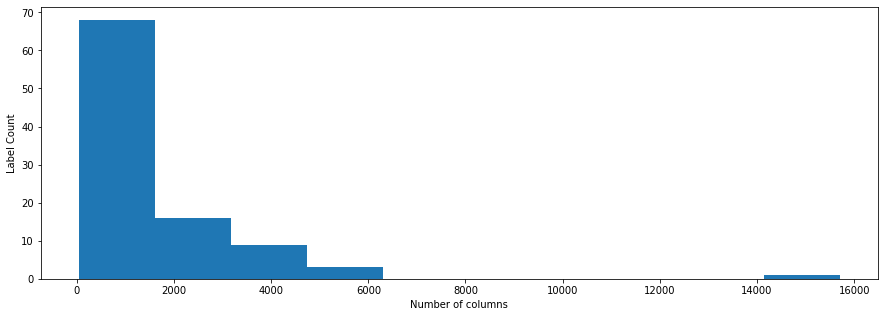

In [33]:
plt.figure(figsize=(15,5))
plt.hist(label_and_number_train.values(), bins=10)
plt.ylabel('Label Count')
plt.xlabel('Number of columns')

### Validation set

In [34]:
#Count how many columns per label
label_and_number_val = {}
for row in X_val:
    
    for label in file_to_label[row[0]].split(','):
        if label in label_and_number_val:
            label_and_number_val[label] += 1
        else:
            label_and_number_val[label] = 1
print('Number of unique relation labels in validation set: '+ str(len(label_and_number_val)))

Number of unique relation labels in validation set: 97


In [35]:
label_and_number_val.values()

dict_values([582, 80, 78, 728, 531, 161, 227, 420, 539, 560, 57, 273, 525, 365, 51, 2119, 716, 66, 44, 13, 9, 32, 37, 128, 28, 5, 178, 446, 314, 256, 214, 139, 250, 29, 85, 701, 288, 403, 169, 137, 42, 375, 274, 237, 295, 117, 221, 15, 42, 46, 73, 137, 52, 98, 7, 64, 73, 58, 37, 47, 116, 6, 18, 74, 18, 118, 277, 84, 240, 11, 62, 243, 96, 16, 16, 154, 130, 59, 31, 31, 149, 43, 26, 40, 183, 34, 16, 11, 99, 794, 39, 64, 91, 139, 114, 46, 29])

In [36]:
print('Minimum column count per label is: '+str(min(label_and_number_val.values())) )
print('Maximum column count per label is: '+str(max(label_and_number_val.values())) )
print('Total column count is: '+str(sum(label_and_number_val.values())) )

Minimum column count per label is: 5
Maximum column count per label is: 2119
Total column count is: 18010


Text(0.5, 0, 'Number of columns')

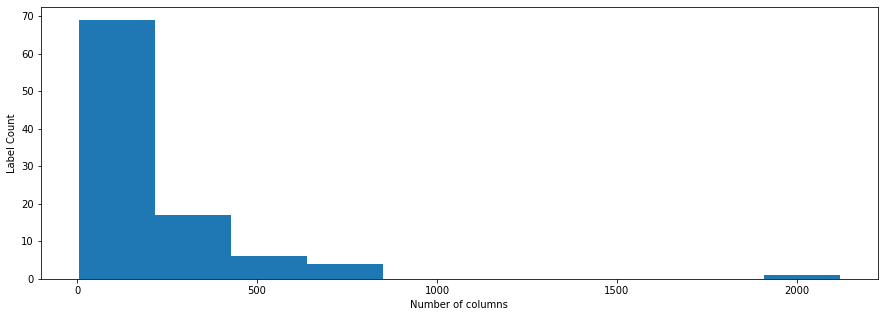

In [37]:
plt.figure(figsize=(15,5))
plt.hist(label_and_number_val.values(), bins=10)
plt.ylabel('Label Count')
plt.xlabel('Number of columns')

### Testing set

In [38]:
#Count how many columns per label
label_and_number_test = {}
for row in X_test:
    
    for label in file_to_label[row[0]].split(','):
        if label in label_and_number_test:
            label_and_number_test[label] += 1
        else:
            label_and_number_test[label] = 1
print('Number of unique relation labels in testing set: '+ str(len(label_and_number_test)))

Number of unique relation labels in testing set: 97


In [39]:
label_and_number_test.values()

dict_values([2216, 445, 774, 165, 80, 560, 596, 51, 80, 536, 273, 363, 272, 58, 556, 524, 13, 747, 9, 63, 37, 144, 29, 5, 179, 325, 444, 43, 213, 256, 251, 29, 131, 86, 280, 404, 282, 659, 168, 155, 118, 220, 233, 18, 294, 343, 47, 41, 32, 41, 89, 136, 68, 52, 73, 58, 85, 33, 9, 49, 7, 109, 18, 73, 278, 18, 111, 83, 240, 10, 55, 244, 104, 16, 16, 130, 158, 58, 26, 155, 30, 34, 42, 30, 11, 35, 192, 9, 68, 724, 39, 109, 76, 140, 115, 46, 30])

In [40]:
print('Minimum column count per label is: '+str(min(label_and_number_test.values())) )
print('Maximum column count per label is: '+str(max(label_and_number_test.values())) )
print('Total column count is: '+str(sum(label_and_number_test.values())) )

Minimum column count per label is: 5
Maximum column count per label is: 2216
Total column count is: 18179


Text(0.5, 0, 'Number of columns')

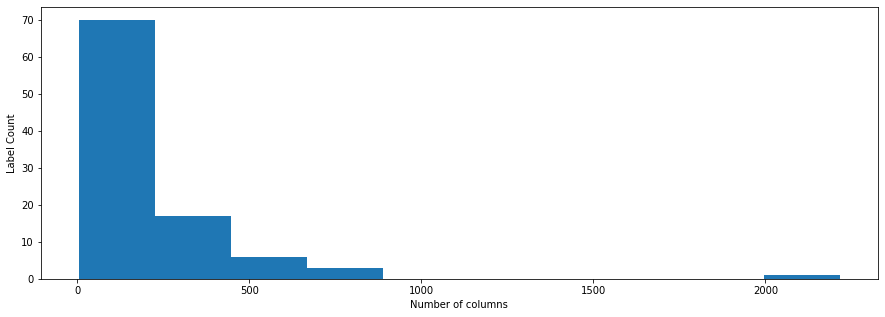

In [41]:
plt.figure(figsize=(15,5))
plt.hist(label_and_number_test.values(), bins=10)
plt.ylabel('Label Count')
plt.xlabel('Number of columns')

## Prepare csv file for each set

In [42]:
training_tables = [ table[0] for table in X_train ]
validation_tables = [ table[0] for table in X_val ]
testing_tables = [ table[0] for table in X_test ]

In [43]:
training_set = dataset.loc[dataset['file_name'].isin(training_tables)]
training_set

,class,column_name,file_name,relation_label,type_label,density,selection_type,values
0,Product,offers:pricecurrency,Product_corememoriesco.com_September2020.json.gz,priceCurrency,currency,100,Inter Similarity,"[USD, USD, USD, USD, USD, USD, USD, USD, USD, ..."
1,Product,offers:price,Product_corememoriesco.com_September2020.json.gz,price,price,100,Value Heterogeneity,"[7.25, 24.95, 26.95, 24.95, 39.95, 24.95, 26.9..."
2,Event,startdate,Event_davidlohmueller.com_September2020.json.gz,startDate,DateTime,100,Inter Similarity,"[2021-05-04T19:00:00+01:00, 2021-03-07T17:30:0..."
3,Event,enddate,Event_davidlohmueller.com_September2020.json.gz,endDate,DateTime,100,Inter Similarity,"[2021-05-04T21:30:00+01:00, 2021-03-07T19:00:0..."
4,Product,offers:pricecurrency,Product_winehousegvl.com_September2020.json.gz,priceCurrency,currency,100,Inter Similarity,"[USD, USD, USD, USD, USD, USD, USD, USD, USD, ..."
...,...,...,...,...,...,...,...,...
171991,CreativeWork,datecreated,CreativeWork_ywbc.org.uk_September2020.json.gz,dateCreated,DateTime,100,Inter Similarity,"[2019-12-22T12:55:44+00:00, 2020-01-05T21:10:2..."
171992,CreativeWork,name,CreativeWork_ywbc.org.uk_September2020.json.gz,name,CreativeWork/name,100,Random,"[Advent week four - Peace, Eight Demons and a ..."
171993,CreativeWork,author:name,CreativeWork_ywbc.org.uk_September2020.json.gz,author,Person,100,Random,"[Rev Richard Alford, Phil Jackman, Phil Jackma..."
171996,SportsEvent,name,SportsEvent_blastertagassociation.com_Septembe...,name,SportsEvent/name,100,Random 2,[Fluffy Rainbow Unicorn Soldiers vs. Doomsday ...


In [47]:
validation_set = dataset.loc[dataset['file_name'].isin(validation_tables)]
validation_set

,class,column_name,file_name,relation_label,type_label,density,selection_type,values
17,Product,offers:price,Product_ablissfullybeautifulboutique.com_Septe...,price,price,100,Inter Similarity,"[80.0, 21.79, 21.79, 36.0, 36.0, 36.0, 32.0, 1..."
18,Product,offers:pricecurrency,Product_ablissfullybeautifulboutique.com_Septe...,priceCurrency,currency,100,Inter Similarity,"[USD, USD, USD, USD, USD, USD, USD, USD, USD, ..."
85,Product,description,Product_holla.pl_September2020.json.gz,description,Text,100,Intra similarity,"[ZEGAREK SMART WATCH DZ-09 SIM 3 KOLORY, PLECA..."
86,Product,name,Product_holla.pl_September2020.json.gz,name,Product/name,100,Intra similarity,"[ZEGAREK SMART WATCH DZ-09, PLECAK REAL MADRYT..."
87,Product,offers:price,Product_holla.pl_September2020.json.gz,price,price,100,Inter Similarity,"[40.01, 149.99, 24.79, 73.89, 14.8, 164.99, 89..."
...,...,...,...,...,...,...,...,...
171937,Recipe,cooktime,Recipe_forkintheroad.co_September2020.json.gz,cookTime,Duration,100,Random 3,"[PT15M, PT0S, PT15M, PT25M, PT0S, PT10M, PT45M..."
171938,Recipe,suitablefordiet,Recipe_forkintheroad.co_September2020.json.gz,suitableForDiet,RestrictedDiet,92,Random 3,"[VeganDiet, VeganDiet, VeganDiet, VegetarianDi..."
171939,Recipe,aggregaterating:reviewcount,Recipe_forkintheroad.co_September2020.json.gz,reviewCount,Integer,95,Random 3,"[1.0, 1.0, 1.0, 2.0, 1.0, nan, nan, 4.0, 1.0, ..."
171940,Recipe,author:name,Recipe_forkintheroad.co_September2020.json.gz,author,Person,100,Random 3,"[Kristina Todini, RDN, Kristina Todini, RDN, K..."


In [48]:
testing_set = dataset.loc[dataset['file_name'].isin(testing_tables)]
testing_set

,class,column_name,file_name,relation_label,type_label,density,selection_type,values
15,Product,offers:price,Product_andgifts.co.uk_September2020.json.gz,price,price,100,Inter Similarity,"[1.29, 2.75, 5.5, 1.25, 2.25, 5.5, 7.99, 2.75,..."
16,Product,offers:pricecurrency,Product_andgifts.co.uk_September2020.json.gz,priceCurrency,currency,100,Inter Similarity,"[GBP, GBP, GBP, GBP, GBP, GBP, GBP, GBP, GBP, ..."
28,LocalBusiness,address:addresslocality,LocalBusiness_litmind.com_September2020.json.gz,addressLocality,addressLocality,34,Missing values,"[None, Madrid, Madrid, None, None, None, None,..."
29,LocalBusiness,address:addressregion,LocalBusiness_litmind.com_September2020.json.gz,addressRegion,addressRegion,36,Missing values,"[None, Madrid, Madrid, None, None, None, None,..."
30,LocalBusiness,address:postalcode,LocalBusiness_litmind.com_September2020.json.gz,postalCode,postalCode,33,Missing values,"[nan, 28017.0, 28001.0, nan, nan, nan, nan, na..."
...,...,...,...,...,...,...,...,...
171959,Museum,name,Museum_bayern.by_September2020.json.gz,name,Museum/name,100,Random 2,"[Museum Penzberg – Sammlung Campendonk, Museen..."
171968,SportsEvent,name,SportsEvent_4smenssoccer.com_September2020.jso...,name,SportsEvent/name,100,Random 2,"[Dark Side of the maMoon vs La Flama Blanca, B..."
171969,SportsEvent,competitor:name,SportsEvent_4smenssoccer.com_September2020.jso...,competitor,SportsTeam,100,Random 2,"[[La Flama Blanca, Dark Side of the maMoon], [..."
171994,Event,location:name,Event_kivasports.net_September2020.json.gz,location,Place,95,Random 3,"[KIVA Sports Center, KIVA Sports Center, None,..."


In [ ]:
#Manual corrections:
#Remove some types that do not have at least 10 examples in test set
#Remove tables with less than 10% density

training_set = training_set.loc[~training_set['type_label'].isin(['Map', 'PublicationEvent', 'VideoObject', 'AggregateRating'])]
training_set = training_set.loc[training_set['density'] >= 10 ]

validation_set = validation_set.loc[~validation_set['type_label'].isin(['Map', 'PublicationEvent', 'VideoObject', 'AggregateRating'])]
validation_set = validation_set.loc[validation_set['density'] >= 10 ]

testing_set = testing_set.loc[~testing_set['type_label'].isin(['Map', 'PublicationEvent', 'VideoObject', 'AggregateRating'])]
testing_set = testing_set.loc[testing_set['density'] >= 10 ]

In [ ]:
#Write all CTA labels in a file
with open('output-data/type_vocab.txt', 'a') as file:
    i = 0
    for label in testing_set['type_label'].unique():
        file.write(str(i)+ '\t' + label +'\n')
        i += 1

### Create small subset of training set

In [ ]:
grouped_by_table = training_set.groupby(['file_name'])['type_label'].apply(','.join).reset_index()
grouped_by_table

In [ ]:
X_train = grouped_by_table[["file_name"]].values

In [ ]:
types_file = open("output-data/type_vocab.txt", 'r')
all_labels = [line.replace('\n', '').split('\t')[1] for line in types_file.readlines()]

In [ ]:
y = np.zeros(shape=(32409, 93)) #encoded labels

In [ ]:
for index, row in grouped_by_table.iterrows():
    table_labels = row['type_label'].split(',')
    count = 0
    
    for label in all_labels:
        if label in table_labels:
            y[index][count] = 1
        else:
            y[index][count] = 0
        count += 1

In [ ]:
X_rest, y_rest, X_test, y_test = iterative_train_test_split(X_train, y, test_size = 0.25)
print('Training set length: '+str(len(X_train)) +', Testing set length: '+ str(len(X_test)))

In [ ]:
#Relation Labels in each set
pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_rest, order=1) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=1) for combination in row)
}).T.fillna(0.0)

In [ ]:
training_tables_small = [ table[0] for table in X_test ]
training_set_small = dataset.loc[dataset['file_name'].isin(training_tables_small)]
training_set_small

### Save splits in files

In [49]:
training_set.to_csv('output-data/training_set_cta.csv.gz', index=False, compression='gzip')

In [49]:
training_set_small.to_csv('output-data/training_set_small_cta.csv.gz', index=False, compression='gzip')

In [50]:
validation_set.to_csv('output-data/validation_set_cta.csv.gz', index=False, compression='gzip')

In [51]:
testing_set.to_csv('output-data/testing_set_cta.csv.gz', index=False, compression='gzip')